For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

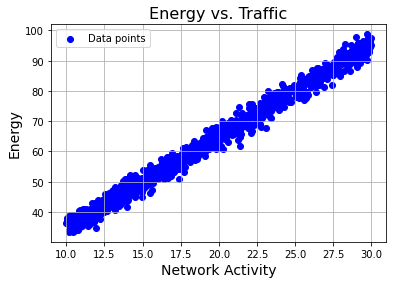

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

a) Visualisation of the fitted curve is provided below.
After training, model learns two things: weights $w_i$ and bias $b$ and the resulting formula for prediction is following: $\hat{y} = b + w_1*x_1 + w_2*x_2 + ... + w_n*x_n$ 

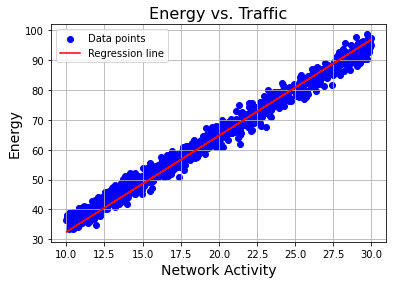

Final training R²: 0.9812028390138005
Accuracy 0.9812036939399069
Weights: [3.22726798]
Bias: 0.1561529525655887
Resulting formula: ŷ = 0.1562 + 3.2273*x1


In [5]:
# Prepare input
X = data[['Net_Activity']].values # shape (m,1), not (m,)
y = data['Energy'].values          # shape (m,)

lr = LinearRegression(epochs=20, learning_rate=0.001)
lr.fit(X,y)

# Predict
y_pred = lr.predict(X)

# Plot regression line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='blue', label='Data points')
plt.plot(X, y_pred, c='red', label='Regression line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


print("Final training R²:", lr.train_accuracies[-1])
print("Accuracy", lr.accuracy(y,y_pred))
print("Weights:", lr.weights)
print("Bias:", lr.bias)
print("Resulting formula: ŷ = {:.4f} + {:.4f}*x1".format(lr.bias, lr.weights[0]))

b) analysis of prediction error distribution

Prediction error is defiened as $ e_i = y_i-\hat{y}_i$, where $y_i$ is the true value and $\hat{y}_i$ is predicted. To evaluete the the model we can plot loss (tap) and accuracy over the epochs.

The plots below show that the loss is decreasing and accuracy increasing, with is good. 

An unbiased estimator is one whose expected value equals the true parameter. In other words, if we repeated sampling many times, the average of our estimates would equal the true value. For example, the sample mean is an unbiased estimator of the population mean.

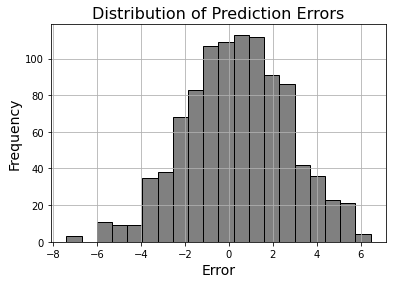

In [6]:
error = data['Energy'] - y_pred
plt.hist(error, bins=20, color='gray', edgecolor='black')
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

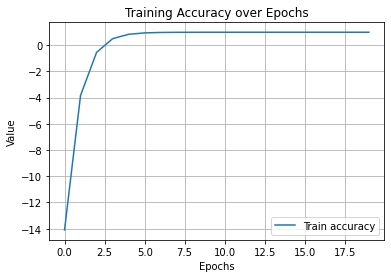

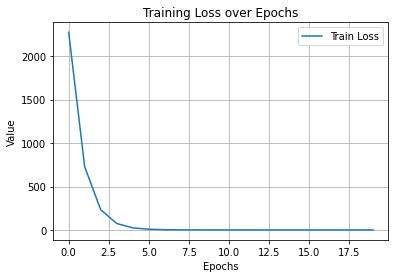

In [7]:
epoch_list = np.arange ( 0, lr.epochs, 1)
plt.plot(epoch_list, lr.train_accuracies, label='Train accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()


plt.plot(epoch_list, lr.losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [8]:
data_task2 = pd.read_csv('mission2.csv')
train = data_task2[data_task2['split'] == 'train']
test = data_task2[data_task2['split'] == 'test']
X_train= train[['x0', 'x1']]
y_train = train['y']

X_test = test[['x0', 'x1']]
y_test = test['y']


In [9]:
from logistic_regression import LogisticRegression 
lor_1= LogisticRegression(learning_rate=0.01, epochs=10000, pred_to_class=0.5)
lor_1.fit(X_train,y_train)
y_pred_lor = lor_1.predict(X_test)

print("Learing rate", lor_1.learning_rate)
print("Pred_to_class", lor_1.pred_to_class)
print("Final training R²:", lor_1.train_accuracies[-1])
print("Accuracy", lor_1.accuracy(y_train,y_pred_lor))

Learing rate 0.01
Pred_to_class 0.5
Final training R²: 1.0
Accuracy 1.0


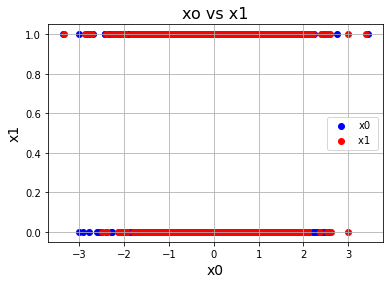

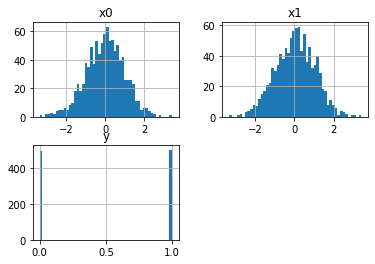

In [10]:
# First we will plot the data to see how it looks like
plt.figure(figsize=(6, 4))
plt.scatter(data_task2['x0'], data_task2['y'], c='blue', label='x0')
plt.scatter(data_task2['x1'], data_task2['y'],  c='red',label='x1 ')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('xo vs x1', fontsize=16)
plt.legend()
plt.show()
data_task2.hist(bins = 50, figsize = (6,4))
plt.show()

Learing rate 0.001
Pred_to_class 0.8
Final training R²: 0.99
Accuracy 0.582


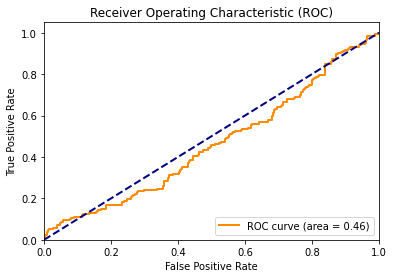

In [11]:
train.loc[train['x1'] < 0, 'x0'] = -train['x0']
test.loc[test['x1'] < 0, 'x0'] = -test['x0']

X_train = train[['x0', 'x1']]
X_test = test[['x0', 'x1']]

y_train = train['y']
y_test = test['y']

lor_2= LogisticRegression(learning_rate=0.001, epochs=10000, pred_to_class=0.8)
lor_2.fit(X_train,y_train)
y_pred_lor = lor_2.predict(X_test)

print("Learing rate", lor_2.learning_rate)
print("Pred_to_class", lor_2.pred_to_class)
print("Final training R²:", lor_2.train_accuracies[-1])
print("Accuracy", lor_2.accuracy(y_train,y_pred_lor))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = lor_2.predict_proba(X_train)  # probabilities for class=1

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # random baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

poly = PolynomialFeatures(degree=10, include_bias=False)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Original number of features:", X_train.shape[1])
print("Number of features after polynomial expansion:", X_train_poly.shape[1])
print("Feature names after polynomial expansion:", poly.get_feature_names_out(['x0', 'x1']))


Original number of features: 2
Number of features after polynomial expansion: 65
Feature names after polynomial expansion: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3' 'x0^4'
 'x0^3 x1' 'x0^2 x1^2' 'x0 x1^3' 'x1^4' 'x0^5' 'x0^4 x1' 'x0^3 x1^2'
 'x0^2 x1^3' 'x0 x1^4' 'x1^5' 'x0^6' 'x0^5 x1' 'x0^4 x1^2' 'x0^3 x1^3'
 'x0^2 x1^4' 'x0 x1^5' 'x1^6' 'x0^7' 'x0^6 x1' 'x0^5 x1^2' 'x0^4 x1^3'
 'x0^3 x1^4' 'x0^2 x1^5' 'x0 x1^6' 'x1^7' 'x0^8' 'x0^7 x1' 'x0^6 x1^2'
 'x0^5 x1^3' 'x0^4 x1^4' 'x0^3 x1^5' 'x0^2 x1^6' 'x0 x1^7' 'x1^8' 'x0^9'
 'x0^8 x1' 'x0^7 x1^2' 'x0^6 x1^3' 'x0^5 x1^4' 'x0^4 x1^5' 'x0^3 x1^6'
 'x0^2 x1^7' 'x0 x1^8' 'x1^9' 'x0^10' 'x0^9 x1' 'x0^8 x1^2' 'x0^7 x1^3'
 'x0^6 x1^4' 'x0^5 x1^5' 'x0^4 x1^6' 'x0^3 x1^7' 'x0^2 x1^8' 'x0 x1^9'
 'x1^10']


Final training R²: 0.942
Accuracy 0.562


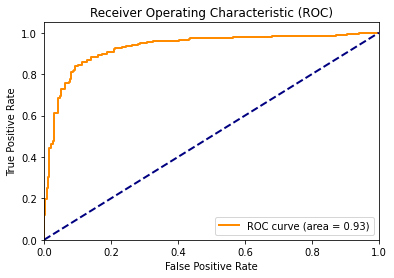

In [19]:
lor_3= LogisticRegression(learning_rate=0.001, epochs=1000, pred_to_class=0.6)
lor_3.fit(X_train_poly,y_train)
y_pred_lor = lor_3.predict(X_test_poly)

print("Final training R²:", lor_3.train_accuracies[-1])
print("Accuracy", lor_3.accuracy(y_train,y_pred_lor))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test : true binary labels (0/1)
# y_scores: predicted probabilities for the positive class
y_scores = lor_3.predict_proba(X_test_poly)  # probabilities for class=1

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # random baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [14]:
corr_matrix = train.corr()['y']
print(corr_matrix)

x0   -0.688459
x1    0.007629
y     1.000000
Name: y, dtype: float64


 **Discussion**:

a. Explain poor initial performance and your improvements

   Bad performance to begin with can be explained due to the feature/s not representing the binary 0/1, with manes it difficult to train a model. 
   

b. What is the model's inductive bias. Why is it important?
   
   Inductive bias is a model’s built-in assumptions about what kinds of patterns are most plausible in data.

   Examples:
   Logistic regression: assumes a linear decision boundary in the input features (after any preprocessing you do).
   Decision trees: favor axis-aligned rules (“if feature j ≤ t then…”) and piecewise-constant regions.

   It is important for the model to have inductive bias to steers learning toward some function more then the others. If bias matches real structure, the model will be easier to teach with less data.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train_poly, y_train)
y_pred_tree = tree.predict(X_test_poly)
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree accuracy: 0.904


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

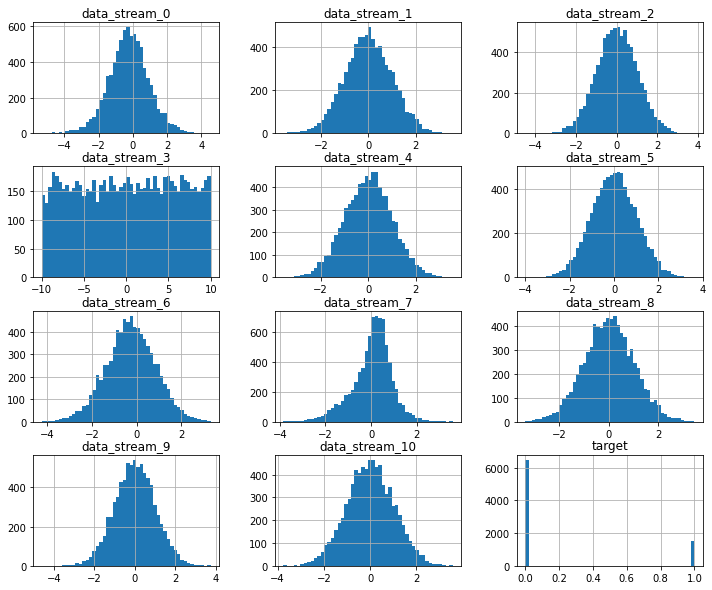

-9.999 0
9.996 0


In [35]:
train_3 = pd.read_csv('mission3_train.csv')
test_3 = pd.read_csv('mission3_test.csv')

train_3.hist(bins = 50, figsize = (12,10))
plt.show()

print(train_3['data_stream_3'].min(), train_3['target'][train_3['data_stream_3'].idxmin()])
print(train_3['data_stream_3'].max(),train_3['target'][train_3['data_stream_3'].idxmax()])


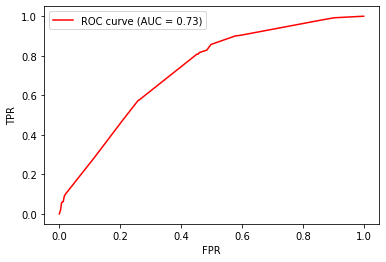

In [36]:
X_train = train_3.drop("target", axis=1)
y_train = train_3["target"]

X_test = test_3.drop("target", axis=1)
y_test = test_3["target"]

X_train["data_stream_3"] = (X_train["data_stream_3"]*1000).astype(int)%2
X_test["data_stream_3"] = (X_test["data_stream_3"]*1000).astype(int)%2

clf = DecisionTreeClassifier(random_state=42,
                              max_depth=5, 
                              min_samples_leaf=4, 
                              min_samples_split=2)
clf.fit(X_train, y_train)

### ROC curve plot
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color="red", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [30]:
from odd_even import parity_from_float

s = train_3['data_stream_3']
train_3['round_3'] = parity_from_float(s, method="round")
train_3['floor_3'] = parity_from_float(s, method="floor")
train_3['ceil_3']  = parity_from_float(s, method="ceil")
train_3['scale_3'] = parity_from_float(s, method="scale_floor", decimals=3)
train_3['last_3'] = parity_from_float(s, method="last_decimal", decimals=1)
train_3['last_2_3']  = parity_from_float(s, method="last_decimal", decimals=2)

In [31]:
# find and sort all stream columns numerically
stream_cols = sorted(
    [c for c in train_3.columns if c.startswith('data_stream_')],
    key=lambda x: int(x.rsplit('_', 1)[1])
)

for i, col in enumerate(stream_cols, start=1):
    s = train_3[col]
    train_3[f'round_{i}']    = parity_from_float(s, method="round")
    train_3[f'floor_{i}']    = parity_from_float(s, method="floor")
    train_3[f'ceil_{i}']     = parity_from_float(s, method="ceil")
    train_3[f'scale3_{i}']   = parity_from_float(s, method="scale_floor", decimals=3)
    train_3[f'last1_{i}']    = parity_from_float(s, method="last_decimal", decimals=1)
    train_3[f'last2_{i}']    = parity_from_float(s, method="last_decimal", decimals=2)


In [32]:
s = train_3['data_stream_3']
s_scaled = s * 1000
s_int = np.round(s_scaled).astype(int)
binary = (s_int % 2 == 0).astype(int)
train_3['feature_stream_3'] = binary
# if the values are integers (or integer-ish floats), do:
s_2 = np.array([0.999, 9.996, 9.777])
# scale
s_2_scaled = s_2 * 1000
print("Scaled:", s_2_scaled)

# round and int
s_2_int = np.round(s_2_scaled).astype(int)
print("Rounded:", s_2_int)

# binary even=1, odd=0
binary_2 = (s_2_int % 2 == 0).astype(int)
print("Binary:", binary_2)

binary_3 = (np.round(s_2).astype(int) % 2 == 0).astype(int)
print(binary_3)


def parity_from_float(s, rule="round"):
    if rule == "round":
        ints = np.rint(s).astype(np.int64)   # nearest integer
    elif rule == "floor":
        ints = np.floor(s).astype(np.int64)  # integer part
    elif rule == "ceil":
        ints = np.ceil(s).astype(np.int64)
    else:
        raise ValueError("rule must be 'round' | 'floor' | 'ceil'")
    return (ints % 2 == 0).astype(int)       # even -> 1, odd -> 0

# example
s = train_3['data_stream_3'].to_numpy()
train_3['binary_1'] = parity_from_float(s, rule="round")
train_3['binary_2'] = parity_from_float(s, rule="floor")
train_3['binary_3'] = parity_from_float(s, rule="ceil")

#for i in range(len(train_3['feature_stream_3'])):
    #print(train_3['data_stream_3'][i],train_3['feature_stream_3'][i],parity_from_float(s, rule="round")[i],parity_from_float(s, rule="floor")[i],parity_from_float(s, rule="ceil")[i], train_3['target'][i])


def floats_to_ints(arr):
    return np.array([int(str(x).replace(".", "")) for x in arr])

s_bin = floats_to_ints(train_3['data_stream_3'])
train_3['binary_4'] = (s_bin % 2 == 0).astype(int)

for i in range(len(train_3['feature_stream_3'])):
    print(train_3['data_stream_3'][i],train_3['binary_4'][i],train_3['target'][i])



Scaled: [ 999. 9996. 9777.]
Rounded: [ 999 9996 9777]
Binary: [0 1 0]
[0 1 1]
-4.47 0 1
-9.14 1 1
-1.936 1 0
0.044 1 0
-4.336 1 0
6.513 0 0
-1.502 1 1
-4.281 0 0
-3.932 1 0
-3.025 0 0
6.902 1 1
-4.422 1 0
-0.664 1 0
9.363 0 0
7.399 0 0
6.086 1 0
-5.15 0 0
-6.773 0 0
7.022 1 0
-4.71 0 1
7.43 0 0
-1.706 1 1
-4.023 0 0
-8.158 1 0
3.321 0 0
3.245 0 0
6.93 0 0
-7.047 0 0
7.944 1 0
-9.97 0 0
-7.75 0 1
-6.42 1 1
7.176 1 1
-8.559 0 0
-8.422 1 0
2.413 0 0
-4.749 0 0
-5.631 0 0
0.189 0 0
9.211 0 0
-1.107 0 0
-1.05 0 1
-7.017 0 0
0.402 1 0
-6.807 0 0
7.221 0 1
-6.796 1 0
9.73 0 0
8.51 0 1
9.769 0 0
0.124 1 1
8.339 0 0
-1.658 1 1
-5.297 0 0
-6.39 0 1
-7.11 0 0
-3.353 0 0
7.834 1 0
4.067 0 0
1.703 0 0
-3.122 1 1
-3.503 0 0
7.319 0 1
-6.343 0 0
2.736 1 0
9.951 0 1
6.841 0 0
6.118 1 1
-1.329 0 0
8.911 0 0
-9.747 0 0
-5.348 1 1
-7.686 1 0
6.691 0 0
8.447 0 0
-8.013 0 0
9.081 0 0
-1.101 0 0
5.766 1 0
9.163 0 0
7.306 1 0
-5.979 0 0
1.309 0 0
6.934 1 0
1.805 0 0
5.341 0 0
-7.856 1 0
9.295 0 0
3.845 0 1
6

In [33]:
# Standardize with train stats only
# mu = X_train.mean(axis=0, keepdims=True)
# sigma = X_train.std(axis=0, keepdims=True) + 1e-8
# X_train_std = (X_train - mu) / sigma
# X_test_std  = (X_test  - mu) / sigma

corr_matrix = train_3.corr()['target']
print(corr_matrix.sort_values(ascending=False)[0:20])

target              1.000000
feature_stream_3    0.226283
scale3_4            0.223966
scale_3             0.223966
binary_4            0.187739
data_stream_0       0.106082
data_stream_7       0.078011
data_stream_6       0.059685
ceil_8              0.041490
last1_2             0.028331
ceil_7              0.024259
data_stream_5       0.023247
ceil_3              0.019281
data_stream_8       0.018737
data_stream_1       0.018010
last2_9             0.016346
floor_1             0.015135
last1_8             0.014735
floor_10            0.014418
round_3             0.014210
Name: target, dtype: float64


### Decryption
For each candidate we replace one column with a binary feature based on integer parity. We try three different integer mappings and will keep the best at the end.

In [ ]:
feature_cols = [c for c in train_3.columns if c.startswith('data_stream_')]
X_train_raw = train_3[feature_cols].copy()
y_train = train_3['target'].values

X_test_raw = test_3[feature_cols].copy()
y_test = test_3['target'].astype(int).values

In [ ]:
def is_even(z:int)-> int: 
    return int((z % 2) == 0)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_lor, y_lor)
y_pred_tree = tree.predict(X_test)
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_tree))

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [ ]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [ ]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)